# House Price Prediction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data exploration & EDA

In [2]:
train_df = pd.read_csv('../data/train (1).csv')
print(f"Train shape: {train_df.shape}")


Train shape: (1460, 81)


In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### House Sale Price distribution
* Lets look at the SalePrice column

In [5]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

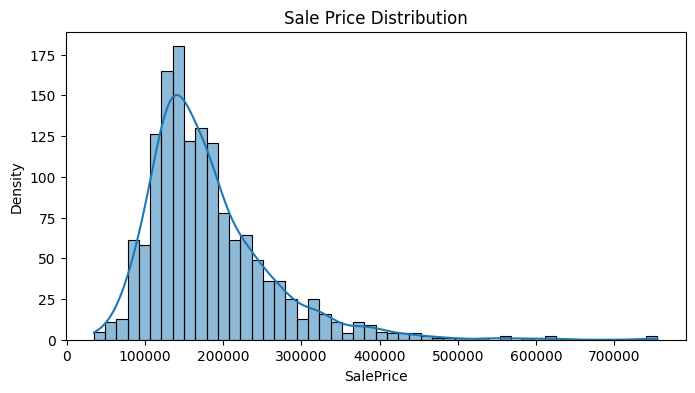

In [6]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df['SalePrice'], bins=50, kde=True)
plt.title('Sale Price Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.show()

## Preprocessing

### Finding Missing Values
we are going to see how many missing values are in each field 

In [7]:
missing = train_df.isnull().sum().sort_values(ascending = False)
missing_percent = (missing/train_df.shape[0]) * 100
missing_df = pd.DataFrame({'MissingCount': missing, 'MissingPercent': missing_percent})
missing_df = missing_df[missing_df.MissingCount > 0]
print(missing_df)

              MissingCount  MissingPercent
PoolQC                1453       99.520548
MiscFeature           1406       96.301370
Alley                 1369       93.767123
Fence                 1179       80.753425
MasVnrType             872       59.726027
FireplaceQu            690       47.260274
LotFrontage            259       17.739726
GarageQual              81        5.547945
GarageFinish            81        5.547945
GarageType              81        5.547945
GarageYrBlt             81        5.547945
GarageCond              81        5.547945
BsmtFinType2            38        2.602740
BsmtExposure            38        2.602740
BsmtCond                37        2.534247
BsmtQual                37        2.534247
BsmtFinType1            37        2.534247
MasVnrArea               8        0.547945
Electrical               1        0.068493


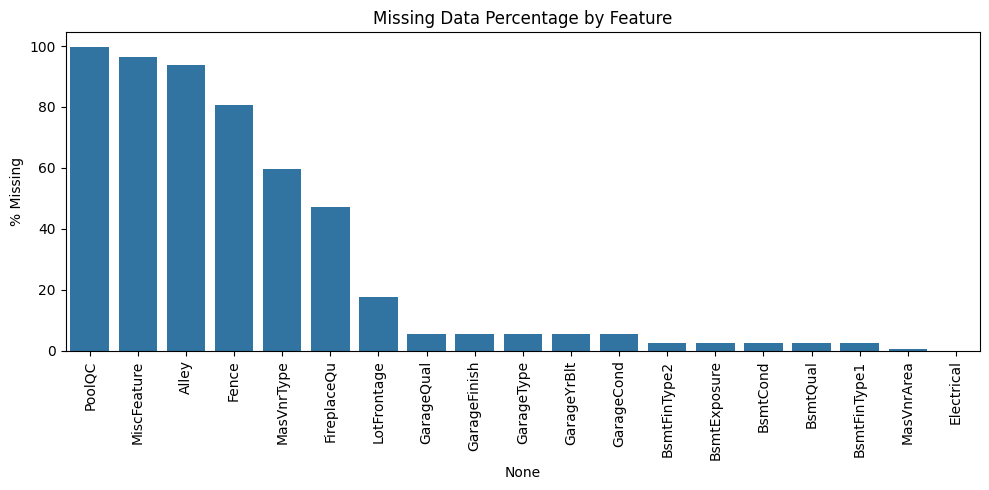

In [8]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=missing_df.index,
    y=missing_df.MissingPercent
)
plt.xticks(rotation=90)
plt.ylabel('% Missing')
plt.title('Missing Data Percentage by Feature')
plt.tight_layout()
plt.show()



### Impute Missing Values

In [9]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())

In [10]:
# Drop features with more than more than 50% missing data
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'GarageYrBlt', 'MasVnrArea']
train_df = train_df.drop(cols_to_drop, axis=1)



# Impute categorical features where NA = most frequent value
for col in ['FireplaceQu', 'GarageQual', 'GarageFinish', 'GarageType', 
            'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 
            'BsmtQual', 'BsmtFinType1', 'Electrical']:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])







In [11]:
print(train_df.isna().sum().sort_values(ascending = False))

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64


In [12]:
train_df.shape

(1460, 74)

### Encoding Categorical Features

In [13]:
columns = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical features:")
print(columns)


Categorical features:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [14]:
len(columns)

38

In [15]:
def category_oneHot_encoding(multcols):
    df_final = final_df
    i = 0
    for fields in multcols:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final = df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
        
    df_final=pd.concat([final_df,df_final],axis=1)
    
    return df_final

In [16]:
main_df = train_df.copy()

In [17]:
test_df = pd.read_csv('../data/test_df_modified.csv')

In [18]:
test_df.shape

(1459, 73)

In [19]:
final_df = pd.concat([train_df,test_df],axis=0)

In [20]:
final_df.shape

(2919, 74)

In [21]:
final_df = category_oneHot_encoding(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [22]:
final_df.shape

(2919, 233)

In [23]:
# remove duplicate features
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [24]:
final_df.shape

(2919, 175)

In [25]:
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,2003,2003,706.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,978.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,486.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,216.0,0.0,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,655.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [26]:
df_train = final_df.iloc[:1460,:]
df_test = final_df.iloc[1460:,:]

In [27]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\2787191513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['SalePrice'],axis=1,inplace=True)


In [28]:
df_test.shape

(1459, 174)

In [29]:
df_test.isna().sum().sort_values(ascending=False)

Id             0
MSSubClass     0
LotFrontage    0
LotArea        0
OverallQual    0
              ..
AdjLand        0
Alloca         0
Family         0
Normal         0
Partial        0
Length: 174, dtype: int64

In [30]:
df_train.to_csv('../data/train_modified.csv', index=False)

In [31]:
import pandas as pd

# Basic overview
print("Shape:", df_train.shape)
print("\nColumns:", df_train.columns.tolist())
print("\nData Types:\n", df_train.dtypes)
print("\nFirst 5 rows:\n", df_train.head())
print("\nMissing values per column:\n", df_train.isnull().sum().sort_values(ascending=False))


Shape: (1460, 175)

Columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'FV', 'RH', 'RL', 'RM', 'Pave', 'IR2', 'IR3', 'Reg', 'HLS', 'Low', 'Lvl', 'NoSeWa', 'CulDSac', 'FR2', 'FR3', 'Inside', 'Mod', 'Sev', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn', '2fmCon', 'Duplex', 'Twnhs'

### Handling skewing for target variable(SalePrice)

In [60]:
df_train['SalePrice'].skew()

np.float64(1.8828757597682129)

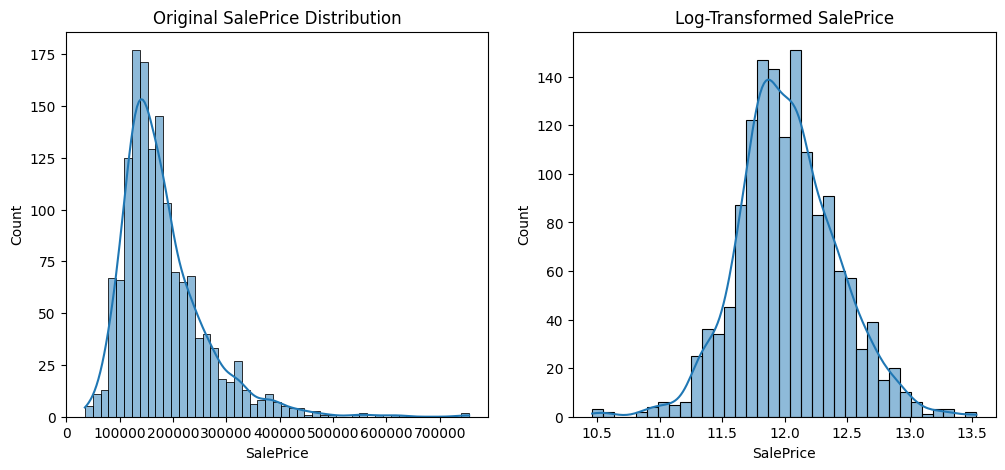

In [62]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_train['SalePrice'], kde=True)
plt.title("Original SalePrice Distribution")

plt.subplot(1,2,2)
sns.histplot(np.log1p(df_train['SalePrice']), kde=True)
plt.title("Log-Transformed SalePrice")

plt.show()

In [63]:
df_train['Log_SalePrice'] = np.log1p(df_train['SalePrice'])
print('Original skewness:', df_train['SalePrice'].skew())
print('Log-transformed skewness:', df_train['Log_SalePrice'].skew())

Original skewness: 1.8828757597682129
Log-transformed skewness: 0.12134661989685333


C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\723842572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Log_SalePrice'] = np.log1p(df_train['SalePrice'])


In [64]:
print("\nColumns:", df_train.columns.tolist())


Columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'FV', 'RH', 'RL', 'RM', 'Pave', 'IR2', 'IR3', 'Reg', 'HLS', 'Low', 'Lvl', 'NoSeWa', 'CulDSac', 'FR2', 'FR3', 'Inside', 'Mod', 'Sev', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE', '1.5Unf

## Feature Engineering

In [65]:
# Total square footage
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']

df_test['TotalSF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\2237826041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\2237826041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['TotalSF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']


In [66]:
# Total Bathrooms
df_train['TotalBath'] = (df_train['FullBath'] + 0.5 * df_train['HalfBath'] +
                   df_train['BsmtFullBath'] + 0.5 * df_train['BsmtHalfBath'])

df_test['TotalBath'] = (df_test['FullBath'] + 0.5 * df_test['HalfBath'] +
                   df_test['BsmtFullBath'] + 0.5 * df_test['BsmtHalfBath'])


C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\1701113819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['TotalBath'] = (df_train['FullBath'] + 0.5 * df_train['HalfBath'] +
C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\1701113819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['TotalBath'] = (df_test['FullBath'] + 0.5 * df_test['HalfBath'] +


In [67]:
# House Age
df_train['HouseAge'] = df_train['YrSold'] - df_train['YearBuilt']

df_test['HouseAge'] = df_test['YrSold'] - df_test['YearBuilt']

C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\1426764302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['HouseAge'] = df_train['YrSold'] - df_train['YearBuilt']
C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\1426764302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['HouseAge'] = df_test['YrSold'] - df_test['YearBuilt']


In [68]:
# Remodeled year
df_train['RemodAge'] = df_train['YrSold'] - df_train['YearRemodAdd']

df_test['RemodAge'] = df_test['YrSold'] - df_test['YearRemodAdd']

C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\2437318068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['RemodAge'] = df_train['YrSold'] - df_train['YearRemodAdd']
C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\2437318068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['RemodAge'] = df_test['YrSold'] - df_test['YearRemodAdd']


In [69]:
# Quality condition
df_train['QualCond'] = df_train['OverallQual'] * df_train['OverallCond']

df_test['QualCond'] = df_test['OverallQual'] * df_test['OverallCond']

C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\1075001173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['QualCond'] = df_train['OverallQual'] * df_train['OverallCond']
C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\1075001173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['QualCond'] = df_test['OverallQual'] * df_test['OverallCond']


In [70]:
# Has Pool, Fireplace, Garage, Basement?
df_train['HasPool'] = (df_train['PoolArea'] > 0).astype(int)
df_train['HasFireplace'] = (df_train['Fireplaces'] > 0).astype(int)
df_train['HasGarage'] = (df_train['GarageArea'] > 0).astype(int)
df_train['HasBsmt'] = (df_train['TotalBsmtSF'] > 0).astype(int)

C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\434882243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['HasPool'] = (df_train['PoolArea'] > 0).astype(int)
C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\434882243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['HasFireplace'] = (df_train['Fireplaces'] > 0).astype(int)
C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\434882243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [71]:
df_test['HasPool'] = (df_test['PoolArea'] > 0).astype(int)
df_test['HasFireplace'] = (df_test['Fireplaces'] > 0).astype(int)
df_test['HasGarage'] = (df_test['GarageArea'] > 0).astype(int)
df_test['HasBsmt'] = (df_test['TotalBsmtSF'] > 0).astype(int)

C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\3933481490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['HasPool'] = (df_test['PoolArea'] > 0).astype(int)
C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\3933481490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['HasFireplace'] = (df_test['Fireplaces'] > 0).astype(int)
C:\Users\Jeylani\AppData\Local\Temp\ipykernel_22108\3933481490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [72]:
print(df_train.corr()['Log_SalePrice'].sort_values(ascending=False).head(20))


Log_SalePrice    1.000000
SalePrice        0.948374
OverallQual      0.817185
TotalSF          0.777297
GrLivArea        0.700927
GarageCars       0.680625
TotalBath        0.673011
GarageArea       0.650888
TotalBsmtSF      0.612134
QualCond         0.606873
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
PConc            0.530840
HasFireplace     0.510026
Gd               0.509675
Fireplaces       0.489450
GLQ              0.440764
Name: Log_SalePrice, dtype: float64


## Model Selection

In [73]:
# Use Log_SalePrice as the target (better for regression stability)
X = df_train.drop(['Id', 'SalePrice', 'Log_SalePrice'], axis=1)
y = df_train['Log_SalePrice']


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

# Evaluate using RMSE
rmse = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_pred)))
print("Linear Regression RMSE:", rmse)


Linear Regression RMSE: 26457.06739858808


In [47]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
rmse_rf = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_pred_rf)))
print("Random Forest RMSE:", rmse_rf)


Random Forest RMSE: 29736.000137995594


In [48]:
# Feature Importance (Random Forest)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print top 10 features
print("Top 10 Feature Importances:")
for i in range(10):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]:.3f}")


Top 10 Feature Importances:
TotalSF: 0.372
OverallQual: 0.372
QualCond: 0.028
GrLivArea: 0.014
GarageCars: 0.014
GarageArea: 0.013
YearBuilt: 0.013
TotalBath: 0.013
LotArea: 0.012
HouseAge: 0.011


### XGBoost

In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
rmse_xgb = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_pred_xgb)))
print("XGBoost RMSE:", rmse_xgb)


XGBoost RMSE: 29166.38285461527


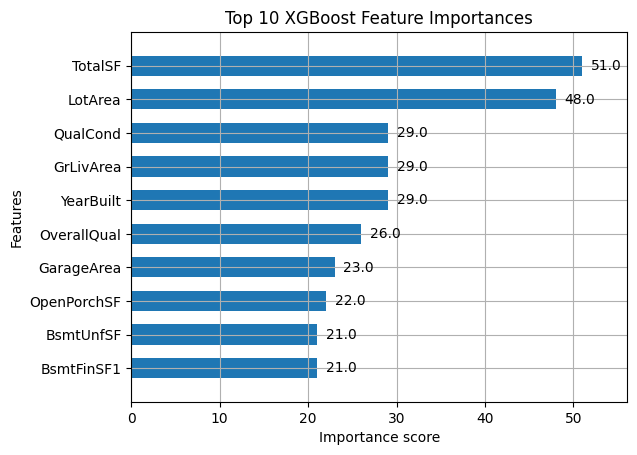

In [51]:
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model, max_num_features=10, height=0.6)
plt.title("Top 10 XGBoost Feature Importances")
plt.show()


### Hyperparameter tuning

#### Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=20,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    random_state=42
)

rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_

# Predict and calculate RMSE
y_pred_rf_tuned = best_rf.predict(X_val)
rmse_rf_tuned = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_pred_rf_tuned)))
print("Tuned Random Forest RMSE:", rmse_rf_tuned)
print("Best Parameters:", rf_random.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 

#### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb_param_grid = {
    'n_estimators': [100, 500, 900,1100,1500],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=20,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    random_state=42
)

xgb_random.fit(X_train, y_train)
best_xgb = xgb_random.best_estimator_

# Predict and calculate RMSE
y_pred_xgb_tuned = best_xgb.predict(X_val)
rmse_xgb_tuned = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_pred_xgb_tuned)))
print("Tuned XGBoost RMSE:", rmse_xgb_tuned)
print("Best Parameters:", xgb_random.best_params_)


## Model Training

In [75]:
# Use all rows for which you have SalePrice (i.e., the full training set)
final_X = df_train.drop(['Id', 'SalePrice', 'Log_SalePrice'], axis=1)
final_y = df_train['Log_SalePrice']

# Retrain the linear regression model on all the data
final_lr = LinearRegression()
final_lr.fit(final_X, final_y)
y_pred = final_lr.predict(X_val)

rmse = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_pred)))
print("Linear Regression RMSE:", rmse)

Linear Regression RMSE: 19674.70649653189


In [76]:
df_test['Id'].head()

0    1461
1    1462
2    1463
3    1464
4    1465
Name: Id, dtype: int64

In [77]:
test_X = df_test.drop(['Id'], axis=1)

In [78]:
test_X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Partial,TotalSF,TotalBath,HouseAge,RemodAge,QualCond,HasPool,HasFireplace,HasGarage,HasBsmt
0,20,80.0,11622,5,6,1961,1961,468.0,144.0,270.0,...,False,1778.0,1.0,49,49,30,0,0,1,1
1,20,81.0,14267,6,6,1958,1958,923.0,0.0,406.0,...,False,2658.0,1.5,52,52,36,0,0,1,1
2,60,74.0,13830,5,5,1997,1998,791.0,0.0,137.0,...,False,2557.0,2.5,13,12,25,0,1,1,1
3,60,78.0,9978,6,6,1998,1998,602.0,0.0,324.0,...,False,2530.0,2.5,12,12,36,0,1,1,1
4,120,43.0,5005,8,5,1992,1992,263.0,0.0,1017.0,...,False,2560.0,2.0,18,18,40,0,0,1,1


In [79]:
# Predict log SalePrice
test_log_preds = final_lr.predict(test_X)

# Convert predictions back to original SalePrice scale
test_preds = np.expm1(test_log_preds)


In [80]:
# Build submission DataFrame
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_preds
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")


Submission file created: submission.csv


In [81]:
submission.shape

(1459, 2)